In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

In [2]:
img = matim.imread('./images/dolphin.jpg')

In [3]:
def adjust_gamma(image, gamma = 1):
            invGamma = 1.0 / gamma 
            table = np.array([
                ((i/255)**invGamma) * 255 for i in np.arange(0, 256)
            ])
            lut_img = cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))
            return lut_img

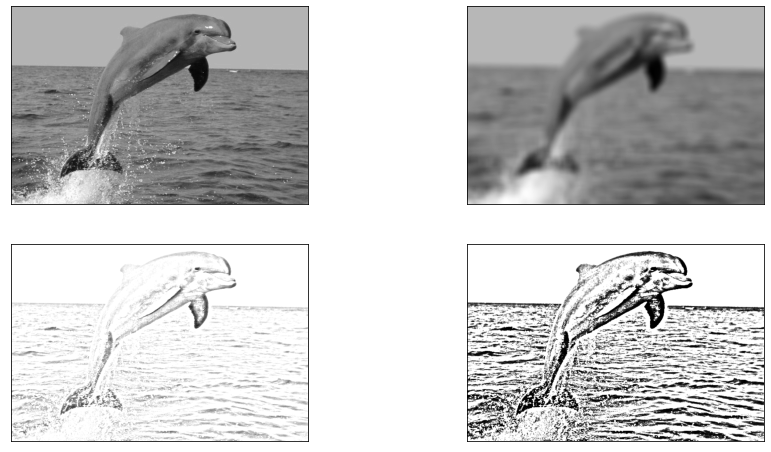

In [6]:
ksize = 21 
sigmaX = 9
gamma = 0.1 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (ksize, ksize), sigmaX) # ksize = 3 ~ 25 / sigmaX = 1 ~ 15 
gray_blur_divide = cv2.divide(gray, gray_blur, scale = 256)
pencil_sketch = adjust_gamma(gray_blur_divide, gamma=gamma) # gamma = 0 ~ 1 

plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1) 
plt.yticks([]), plt.xticks([])
plt.imshow(gray, cmap = "gray")
plt.subplot(2, 2, 2)
plt.yticks([]), plt.xticks([])
plt.imshow(gray_blur, cmap = "gray")
plt.subplot(2, 2, 3)
plt.yticks([]), plt.xticks([])
plt.imshow(gray_blur_divide, cmap = "gray")
plt.subplot(2, 2, 4)
plt.yticks([]), plt.xticks([])
plt.imshow(pencil_sketch, cmap = "gray")